In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd
import pandas as pd

2021-12-16 13:51:52.322451: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-16 13:51:52.322498: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
#training data
df = pd.read_csv('Full_data_Asia_cotton_wheat_other_crops_2018_training_training_data.csv')
Full_data = df
print(df.shape)
df.head()

(1854556, 65)


,fid,label,row_loc,col_loc,tile,20180523_B01,20180523_B02,20180523_B03,20180523_B04,20180523_B05,...,20180915_B03,20180915_B04,20180915_B05,20180915_B06,20180915_B07,20180915_B08,20180915_B8A,20180915_B09,20180915_B11,20180915_B12
0,1000886,2,6325,9716,0,1085,1154,1524,1816,2265,...,1312,1648,1727,2431,2689,2750,2896,3223,2523,2067
1,1000886,2,6325,9717,0,1085,1282,1810,2156,2265,...,1510,1760,1727,2431,2689,4034,2896,3223,2523,2067
2,1000886,2,6326,9716,0,1085,1214,1620,1970,2393,...,1322,1526,1776,2851,3145,3232,3204,3223,2481,1929
3,1000886,2,6326,9717,0,1085,1394,1914,2350,2393,...,1408,1680,1776,2851,3145,3658,3204,3223,2481,1929
4,1000886,2,6326,9718,0,1085,1282,1802,2188,2601,...,1508,1782,1985,3267,3582,3828,3723,3223,2607,1950


In [4]:
#testing data
df1 = pd.read_csv('Full_data_Asia_cotton_wheat_other_crops_2018_testing_data.csv')
Full_data = df1
print(df1.shape)
df1.head()

(203633, 65)


,fid,label,row_loc,col_loc,tile,20180523_B01,20180523_B02,20180523_B03,20180523_B04,20180523_B05,...,20180915_B03,20180915_B04,20180915_B05,20180915_B06,20180915_B07,20180915_B08,20180915_B8A,20180915_B09,20180915_B11,20180915_B12
0,1002037,1,6797,4106,1,699.0,694.0,1074.0,1156.0,1580.0,...,1032.0,1126.0,1587.0,2739.0,3100.0,3344.0,3254.0,3244.0,2206.0,1656.0
1,1002037,1,6797,4107,1,699.0,426.0,735.0,716.0,1580.0,...,1476.0,1670.0,1587.0,2739.0,3100.0,3352.0,3254.0,3244.0,2206.0,1656.0
2,1002037,1,6797,4108,1,699.0,381.0,646.0,607.0,1127.0,...,1628.0,2062.0,2181.0,2652.0,2821.0,3272.0,2985.0,3244.0,2732.0,2374.0
3,1002037,1,6798,4105,1,340.0,839.0,1210.0,1368.0,1701.0,...,1192.0,1272.0,1717.0,2712.0,3004.0,3344.0,3055.0,2692.0,2268.0,1836.0
4,1002037,1,6798,4106,1,340.0,498.0,813.0,817.0,1068.0,...,1414.0,1708.0,2119.0,2550.0,2694.0,3050.0,2769.0,2692.0,2763.0,2462.0


In [5]:
#Training
list_of_column_names = list(df.columns)
  
# displaying the list of column names
print('List of column names : ', 
      list_of_column_names)

List of column names :  ['fid', 'label', 'row_loc', 'col_loc', 'tile', '20180523_B01', '20180523_B02', '20180523_B03', '20180523_B04', '20180523_B05', '20180523_B06', '20180523_B07', '20180523_B08', '20180523_B8A', '20180523_B09', '20180523_B11', '20180523_B12', '20180617_B01', '20180617_B02', '20180617_B03', '20180617_B04', '20180617_B05', '20180617_B06', '20180617_B07', '20180617_B08', '20180617_B8A', '20180617_B09', '20180617_B11', '20180617_B12', '20180727_B01', '20180727_B02', '20180727_B03', '20180727_B04', '20180727_B05', '20180727_B06', '20180727_B07', '20180727_B08', '20180727_B8A', '20180727_B09', '20180727_B11', '20180727_B12', '20180816_B01', '20180816_B02', '20180816_B03', '20180816_B04', '20180816_B05', '20180816_B06', '20180816_B07', '20180816_B08', '20180816_B8A', '20180816_B09', '20180816_B11', '20180816_B12', '20180915_B01', '20180915_B02', '20180915_B03', '20180915_B04', '20180915_B05', '20180915_B06', '20180915_B07', '20180915_B08', '20180915_B8A', '20180915_B09', '

In [6]:
#testing
list_of_column_names = list(df1.columns)
  
# displaying the list of column names
print('List of column names : ', 
      list_of_column_names)

List of column names :  ['fid', 'label', 'row_loc', 'col_loc', 'tile', '20180523_B01', '20180523_B02', '20180523_B03', '20180523_B04', '20180523_B05', '20180523_B06', '20180523_B07', '20180523_B08', '20180523_B8A', '20180523_B09', '20180523_B11', '20180523_B12', '20180617_B01', '20180617_B02', '20180617_B03', '20180617_B04', '20180617_B05', '20180617_B06', '20180617_B07', '20180617_B08', '20180617_B8A', '20180617_B09', '20180617_B11', '20180617_B12', '20180727_B01', '20180727_B02', '20180727_B03', '20180727_B04', '20180727_B05', '20180727_B06', '20180727_B07', '20180727_B08', '20180727_B8A', '20180727_B09', '20180727_B11', '20180727_B12', '20180816_B01', '20180816_B02', '20180816_B03', '20180816_B04', '20180816_B05', '20180816_B06', '20180816_B07', '20180816_B08', '20180816_B8A', '20180816_B09', '20180816_B11', '20180816_B12', '20180915_B01', '20180915_B02', '20180915_B03', '20180915_B04', '20180915_B05', '20180915_B06', '20180915_B07', '20180915_B08', '20180915_B8A', '20180915_B09', '

In [10]:
# Training
fids = df['fid'].unique

In [11]:
# Testing
fids = df1['fid'].unique

In [12]:
# training
# max_value = df.to_numpy().max()
max_value = df[list_of_column_names[5:]].to_numpy().max()
print(max_value)

11696


In [13]:
# testing
max_value = df1[list_of_column_names[5:]].to_numpy().max()
print(max_value)

5860.0


In [15]:
max_value = 11696

In [12]:
# train = df[(df['fid'] > 1) & (df['fid'] <= 1295)]
# print ("Train data shape:",train.shape)
# validation= df[(df['fid'] > 1295) & (df['fid'] <= 1573)]
# print ("Validation data shape:",validation.shape)
# test = df[df['fid'] > 1573]
# print ("Test data shape:",test.shape)

In [16]:
train_check = df.loc[df.label > 10]
val_check = df.loc[df.label > 10]
train_check.shape, val_check.shape
# train.head()

((0, 65), (0, 65))

In [14]:
# val =  df1
# val.shape,

In [17]:
# group_train
train_grouped = df.groupby('fid').mean().reset_index()
# test_grouped = test.groupby('fid').mean().reset_index()
train_grouped.head()
# test_grouped.head()

,fid,label,row_loc,col_loc,tile,20180523_B01,20180523_B02,20180523_B03,20180523_B04,20180523_B05,...,20180915_B03,20180915_B04,20180915_B05,20180915_B06,20180915_B07,20180915_B08,20180915_B8A,20180915_B09,20180915_B11,20180915_B12
0,1000001,2.0,6879.449324,4131.104730,1.0,934.706081,1281.577703,1766.331081,2260.554054,2419.523649,...,769.486486,723.270270,1248.908784,2924.986486,3419.702703,3705.418919,3588.604730,3616.689189,1771.594595,1141.300676
1,1000002,2.0,6900.639301,4142.662009,1.0,1014.786900,1403.611354,1917.923144,2439.451528,2602.896070,...,728.159825,672.917904,1223.949345,2720.457642,3134.012227,3374.420961,3277.004367,3303.967686,1623.747598,1017.874236
2,1000003,2.0,6923.320996,4114.007020,1.0,914.619017,1294.645820,1790.247607,2340.177409,2483.268028,...,749.272495,751.844288,1210.204212,2669.949585,3087.539247,3317.230377,3216.981493,3231.868539,1714.499043,1139.816209
3,1000004,2.0,6996.474708,4098.463035,1.0,1032.984436,1411.112840,1915.922179,2477.704280,2622.887160,...,1173.544747,1317.178988,1735.054475,2862.284047,3207.848249,3450.661479,3322.229572,3303.431907,2364.727626,1849.778210
4,1000005,2.0,6864.043250,4121.942333,1.0,1124.249017,1569.803408,2106.115334,2661.643512,2812.981651,...,995.321101,986.003932,1591.956750,3198.521625,3620.277851,3888.838794,3753.905636,3745.402359,2022.475754,1391.536042


In [18]:
# group_validation
val_grouped = df1.groupby('fid').mean().reset_index()
val_grouped.head()

,fid,label,row_loc,col_loc,tile,20180523_B01,20180523_B02,20180523_B03,20180523_B04,20180523_B05,...,20180915_B03,20180915_B04,20180915_B05,20180915_B06,20180915_B07,20180915_B08,20180915_B8A,20180915_B09,20180915_B11,20180915_B12
0,1002001,2.0,7167.029304,4603.450549,1.0,916.285714,1329.208791,1826.102564,2331.223443,2499.780220,...,1009.498168,1003.296703,1662.897436,3283.721612,3765.304029,4044.073260,3922.912088,3894.531136,2231.908425,1491.586081
1,1002002,1.0,7178.323077,4602.400000,1.0,583.603077,689.750769,1077.821538,1176.120000,1651.609231,...,1867.735385,2399.704615,2746.116923,3328.280000,3593.230769,3861.169231,3758.326154,3788.526154,3397.295385,2803.350769
2,1002003,2.0,7192.691729,4579.911278,1.0,926.583459,1302.069173,1812.159398,2375.019549,2520.421053,...,990.539850,1028.103759,1710.627068,2989.921805,3349.454135,3588.421053,3489.335338,3500.190977,2166.899248,1474.772932
3,1002004,2.0,7226.382812,4611.000000,1.0,776.523438,1252.683594,1740.554688,2245.742188,2382.027344,...,1147.296875,1208.910156,1875.636719,3230.203125,3618.929688,3874.578125,3762.875000,3751.183594,2414.382812,1710.039062
4,1002005,1.0,7238.490775,4616.332103,1.0,543.177122,667.630996,1032.036900,1143.549815,1598.826568,...,1852.000000,2405.715867,2721.959410,3203.221402,3447.671587,3707.298893,3616.612546,3662.616236,3450.239852,2837.874539


In [17]:
# X_test = test_grouped.drop(columns=['label', 'fid', 'row_loc', 'col_loc', 'tile'])
# print (X_test.shape)
# test_npy = X_test.to_numpy()
# X_test.head()

In [19]:

# Generating training and validation data based on field ids
train_percentage = 0.8

n_fields = len(train_grouped['fid'])
# np.random.seed(10)
# train_fields = np.random.choice(df['field_id'], int(n_fields * train_percentage), replace=False)
# val_fields = df['field_id'][~np.in1d(df['field_id'], train_fields)]

X_train, X_test = train_test_split(train_grouped, test_size=0.2)
y_train, y_test = X_train["label"], X_test["label"]
# X_train, X_val = df[df['field_id'].isin(train_fields)], df[df['field_id'].isin(val_fields)]
X_train = X_train.drop(columns=['label', 'fid', 'row_loc', 'col_loc', 'tile'])
X_test = X_test.drop(columns=['label', 'fid', 'row_loc', 'col_loc', 'tile'])
# y_train, y_val = df[df['field_id'].isin(train_fields)]['label'], df[df['field_id'].isin(val_fields)]['label']


# validation

X_val = val_grouped.drop(columns=['label', 'fid', 'row_loc', 'col_loc', 'tile'])
y_val = val_grouped["label"]
# print (X_val.shape, y_val.shape)


print(
    f"Train data shape is {X_train.shape}\n",
    f"testing data shape is {X_test.shape}\n",
    f"validation data shape is {X_val.shape}\n",
)



train_npy = X_train.to_numpy()
test_npy = X_test.to_numpy()
val_npy = X_val.to_numpy()
#test_grouped = 

Train data shape is (1235, 60)
 testing data shape is (309, 60)
 validation data shape is (294, 60)



In [20]:
print(max_value)

11696


In [21]:
X_train.head()

,20180523_B01,20180523_B02,20180523_B03,20180523_B04,20180523_B05,20180523_B06,20180523_B07,20180523_B08,20180523_B8A,20180523_B09,...,20180915_B03,20180915_B04,20180915_B05,20180915_B06,20180915_B07,20180915_B08,20180915_B8A,20180915_B09,20180915_B11,20180915_B12
81,927.832817,1237.934985,1732.582043,2219.399381,2493.482972,2810.458204,2956.804954,3200.643963,3070.708978,3027.489164,...,1790.452012,2311.300310,2602.990712,2956.495356,3140.767802,3306.117647,3262.854489,3308.092879,3537.294118,3182.383901
1017,736.549180,944.135929,1288.865437,1657.659836,1772.334699,1944.039617,2068.521858,2158.572404,2116.289617,2152.170765,...,855.415301,767.584699,1470.972678,3561.087432,4188.177596,4518.607923,4357.307377,4321.128415,1981.486339,1146.879781
1088,1466.993485,1684.922638,2025.706840,2417.167752,2607.690147,2882.823290,3032.973534,3238.715798,3083.133958,3621.864007,...,861.384772,776.656352,1350.822476,3422.858713,4021.460912,4378.909609,4183.748779,4084.225163,1945.050896,1192.500407
312,349.075980,422.845588,708.872549,678.622549,1128.166667,2649.357843,3470.397059,3798.171569,3676.921569,3629.274510,...,1391.926471,1832.088235,2028.318627,2178.468137,2301.026961,2415.524510,2398.431373,2505.379902,2761.159314,2496.426471
189,893.129784,1214.629784,1680.364393,2244.274542,2398.591514,2569.108985,2690.876040,2837.858569,2745.382696,2785.295341,...,1241.411814,1489.938436,1859.478369,2554.477537,2791.935108,2930.427621,2895.649750,2913.010815,2484.084859,2034.549917


In [21]:
# list_of_column_names = list(X_train.columns)
  
# # displaying the list of column names
# print('List of column names : ', 
#       list_of_column_names)

In [22]:
# train_npy = train.to_numpy()
# test_npy = test.to_numpy()
# val_npy = validation.to_numpy()

In [22]:
yTrain = y_train
print("The initial training labels are ",np.unique(yTrain))
yTrain = yTrain - 1
print("The edited training labels are ",np.unique(yTrain))
# yTest = test_npy[:,-1].astype(int)
yTest = y_test
print("The initial testing labels are ",np.unique(yTest))
yTest = yTest - 1
# yTest = yTest - 1
print("The edited testing labels are ",np.unique(yTest))
yVal = y_val
print("The initial testing labels are ",np.unique(yVal))
yVal = yVal - 1
# yTest = yTest - 1
print("The edited testing labels are ",np.unique(yVal))

The initial training labels are  [1. 2. 3. 4. 5. 6. 7. 8.]
The edited training labels are  [0. 1. 2. 3. 4. 5. 6. 7.]
The initial testing labels are  [1. 2. 3. 4. 5. 6. 7.]
The edited testing labels are  [0. 1. 2. 3. 4. 5. 6.]
The initial testing labels are  [1. 2. 3. 4. 5. 6. 7. 8.]
The edited testing labels are  [0. 1. 2. 3. 4. 5. 6. 7.]


In [24]:
# ytest = y_test
# print("The initial training labels are ",np.unique(ytest))
# ytest = ytest - 1
# print("The edited training labels are ",np.unique(ytest))
# yTest = test_npy[:,-1].astype(int)
# yVal = y_val
# print("The initial testing labels are ",np.unique(yVal))
# yVal = yVal - 1
# # yTest = yTest - 1
# print("The edited testing labels are ",np.unique(yVal))

In [25]:
# field_idvalues =  val_npy[:,0]
# print(field_idvalues.shape)
# # print(field_idvalues)

In [23]:
#imagedata
# xTrain = train_npy[:,5:-1]
print("xTrain shape: ",X_train.shape)
# xTest = test_npy[:,5:-1]
# print("xTest shape: ",xTest.shape)
# xVal = val_npy[:,5:-1]
print("xTest shape: ",X_test.shape)
print("xVal shape: ",X_val.shape)
# print("yTest shape: ",yTest.shape)
print("yTrain shape: ",yTrain.shape)
print("yTest shape: ",yTest.shape)
print("yVal shape: ",yVal.shape)
print("Maximum_value: ",max_value)

xTrain shape:  (1235, 60)
xTest shape:  (309, 60)
xVal shape:  (294, 60)
yTrain shape:  (1235,)
yTest shape:  (309,)
yVal shape:  (294,)
Maximum_value:  11696


In [24]:
(unique, counts) = np.unique(yTrain, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print('Train freq:', frequencies)

(unique, counts) = np.unique(yTest, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print('Test freq:', frequencies)

Train freq: [[  0. 539.]
 [  1. 579.]
 [  2.   6.]
 [  3.  33.]
 [  4.   5.]
 [  5.  52.]
 [  6.   8.]
 [  7.  13.]]
Test freq: [[  0. 137.]
 [  1. 142.]
 [  2.   4.]
 [  3.   3.]
 [  4.   2.]
 [  5.  20.]
 [  6.   1.]]


In [25]:
X_train = train_npy
X_test = test_npy
X_val = val_npy
print("xTrain shape: ",X_train.shape)
print("xTest shape: ",X_test.shape)
print("xVal shape: ",X_val.shape)

xTrain shape:  (1235, 60)
xTest shape:  (309, 60)
xVal shape:  (294, 60)


In [29]:
# print("ytest shape: ",y_test.shape)

In [30]:
# y_test_npy = y_test.to_numpy()
# ytest = y_test_npy / max_value
# ytest = np.reshape(ytest,(256,2,12))
# print("ytest:",ytest.shape)

In [28]:
# Normalise the data
xTrain = X_train / max_value
xTest = X_test / max_value
xVal = X_val/max_value
# Reshape the data
xTrain = np.reshape(xTrain,(1235,5,12))
xTest = np.reshape(xTest,(309,5,12))
xVal = np.reshape(xVal,(294,5,12))

test_npy

# xTrain = np.expand_dims(xTrain,axis =-1)
# xTest = np.expand_dims(xTest,axis =-1)


# Print the shape of reshaped data
print("xTrain:",xTrain.shape)
print("xTest:",xTest.shape)
print("xVal:",xVal.shape)

xTrain: (1235, 5, 12)
xTest: (309, 5, 12)
xVal: (294, 5, 12)


In [29]:
import keras_tuner as kt
from tensorflow import keras
from keras_tuner import RandomSearch

In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [31]:
label = train_grouped["label"]
print (label.max())

8.0


In [33]:
from sklearn.utils import class_weight
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()  
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(label),
                                                 label)

# class_weights_dict = dict(zip(le.transform(list(le.classes_)), class_weights))
print("Class weights are...:", class_weights)
# from sklearn.utils import class_weight
# weight = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
class_weight = {i : class_weights[i] for i in range(8)} 
print("Class weights are...:", class_weight)

Class weights are...: [ 0.28550296  0.26768377 19.3         5.36111111 27.57142857  2.68055556
 21.44444444 14.84615385]
Class weights are...: {0: 0.28550295857988167, 1: 0.26768377253814146, 2: 19.3, 3: 5.361111111111111, 4: 27.571428571428573, 5: 2.6805555555555554, 6: 21.444444444444443, 7: 14.846153846153847}


In [38]:
modelName= "CNN_Asia_Cotton_model_20211216"
#save the best weights over9the same file with the model name

modelpath = f"{modelName}_bestweights.hdf5" #the model will be saved in the same folder as where the notebook is
checkpoint = ModelCheckpoint(modelpath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max') #max validation accuracy
callbacks_list = [checkpoint]

In [35]:
myadam = keras.optimizers.Adam(learning_rate=0.003)

In [40]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(64,1,activation ='relu', input_shape = (5,12)),
#     tf.keras.layers.MaxPooling1D(pool_size=2, strides=2),
#     tf.keras.layers.Conv1D(32,1, activation ='relu'), 
#     tf.keras.layers.MaxPooling1D(pool_size=2, strides=2),
#     tf.keras.layers.Conv1D(32,2, activation ='relu'), 
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(352, activation ='relu'),
    tf.keras.layers.Dense(8, activation ='softmax')
])

model.compile(loss = 'sparse_categorical_crossentropy', 
     optimizer = myadam,               
              metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 5, 64)             832       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 2, 64)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 352)               45408     
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 2824      
Total params: 49,064
Trainable params: 49,064
Non-trainable params: 0
__________________________________________________

In [41]:
history = model.fit(
    xTrain,
    yTrain,
    batch_size=30,
    epochs=500,
    validation_data=(xTest, yTest), 
    class_weight = class_weight,
    callbacks=callbacks_list,
)

Epoch 1/500
42/42 [==============================] - 1s 6ms/step - loss: 2.1233 - accuracy: 0.0664 - val_loss: 1.8685 - val_accuracy: 0.0097

Epoch 00001: val_accuracy improved from -inf to 0.00971, saving model to CNN_Asia_Cotton_model_20211216_bestweights.hdf5
Epoch 2/500
42/42 [==============================] - 0s 2ms/step - loss: 2.1337 - accuracy: 0.0599 - val_loss: 2.0530 - val_accuracy: 0.0065

Epoch 00002: val_accuracy did not improve from 0.00971
Epoch 3/500
42/42 [==============================] - 0s 3ms/step - loss: 2.0800 - accuracy: 0.1992 - val_loss: 1.8488 - val_accuracy: 0.3010

Epoch 00003: val_accuracy improved from 0.00971 to 0.30097, saving model to CNN_Asia_Cotton_model_20211216_bestweights.hdf5
Epoch 4/500
42/42 [==============================] - 0s 2ms/step - loss: 2.0583 - accuracy: 0.3320 - val_loss: 1.9298 - val_accuracy: 0.5955

Epoch 00004: val_accuracy improved from 0.30097 to 0.59547, saving model to CNN_Asia_Cotton_model_20211216_bestweights.hdf5
Epoch 5/

42/42 [==============================] - 0s 2ms/step - loss: 1.5957 - accuracy: 0.6615 - val_loss: 1.0638 - val_accuracy: 0.7767

Epoch 00041: val_accuracy did not improve from 0.81877
Epoch 42/500
42/42 [==============================] - 0s 2ms/step - loss: 1.5269 - accuracy: 0.7449 - val_loss: 0.8167 - val_accuracy: 0.7799

Epoch 00042: val_accuracy did not improve from 0.81877
Epoch 43/500
42/42 [==============================] - 0s 2ms/step - loss: 1.5809 - accuracy: 0.7190 - val_loss: 0.9815 - val_accuracy: 0.7896

Epoch 00043: val_accuracy did not improve from 0.81877
Epoch 44/500
42/42 [==============================] - 0s 2ms/step - loss: 1.5524 - accuracy: 0.7587 - val_loss: 0.9980 - val_accuracy: 0.7767

Epoch 00044: val_accuracy did not improve from 0.81877
Epoch 45/500
42/42 [==============================] - 0s 2ms/step - loss: 1.4027 - accuracy: 0.6575 - val_loss: 0.8742 - val_accuracy: 0.7605

Epoch 00045: val_accuracy did not improve from 0.81877
Epoch 46/500
42/42 [===

42/42 [==============================] - 0s 2ms/step - loss: 1.3411 - accuracy: 0.7126 - val_loss: 0.8621 - val_accuracy: 0.7023

Epoch 00123: val_accuracy did not improve from 0.82201
Epoch 124/500
42/42 [==============================] - 0s 2ms/step - loss: 1.3199 - accuracy: 0.7619 - val_loss: 0.8275 - val_accuracy: 0.7929

Epoch 00124: val_accuracy did not improve from 0.82201
Epoch 125/500
42/42 [==============================] - 0s 2ms/step - loss: 1.3426 - accuracy: 0.7547 - val_loss: 0.8692 - val_accuracy: 0.8026

Epoch 00125: val_accuracy did not improve from 0.82201
Epoch 126/500
42/42 [==============================] - 0s 2ms/step - loss: 1.4317 - accuracy: 0.5401 - val_loss: 0.8271 - val_accuracy: 0.7638

Epoch 00126: val_accuracy did not improve from 0.82201
Epoch 127/500
42/42 [==============================] - 0s 2ms/step - loss: 1.3293 - accuracy: 0.7474 - val_loss: 0.9073 - val_accuracy: 0.7055

Epoch 00127: val_accuracy did not improve from 0.82201
Epoch 128/500
42/42

42/42 [==============================] - 0s 2ms/step - loss: 1.3122 - accuracy: 0.7466 - val_loss: 0.8434 - val_accuracy: 0.7767

Epoch 00205: val_accuracy did not improve from 0.82201
Epoch 206/500
42/42 [==============================] - 0s 2ms/step - loss: 1.3503 - accuracy: 0.7360 - val_loss: 0.9661 - val_accuracy: 0.7217

Epoch 00206: val_accuracy did not improve from 0.82201
Epoch 207/500
42/42 [==============================] - 0s 2ms/step - loss: 1.3356 - accuracy: 0.7393 - val_loss: 0.8871 - val_accuracy: 0.7282

Epoch 00207: val_accuracy did not improve from 0.82201
Epoch 208/500
42/42 [==============================] - 0s 2ms/step - loss: 1.3354 - accuracy: 0.7506 - val_loss: 0.8858 - val_accuracy: 0.7961

Epoch 00208: val_accuracy did not improve from 0.82201
Epoch 209/500
42/42 [==============================] - 0s 2ms/step - loss: 1.3121 - accuracy: 0.7417 - val_loss: 0.9594 - val_accuracy: 0.7605

Epoch 00209: val_accuracy did not improve from 0.82201
Epoch 210/500
42/42

42/42 [==============================] - 0s 2ms/step - loss: 1.3304 - accuracy: 0.7053 - val_loss: 1.0107 - val_accuracy: 0.7670

Epoch 00287: val_accuracy did not improve from 0.82201
Epoch 288/500
42/42 [==============================] - 0s 2ms/step - loss: 1.2991 - accuracy: 0.7522 - val_loss: 0.9714 - val_accuracy: 0.7249

Epoch 00288: val_accuracy did not improve from 0.82201
Epoch 289/500
42/42 [==============================] - 0s 2ms/step - loss: 1.1720 - accuracy: 0.6972 - val_loss: 0.8878 - val_accuracy: 0.7735

Epoch 00289: val_accuracy did not improve from 0.82201
Epoch 290/500
42/42 [==============================] - 0s 2ms/step - loss: 1.1865 - accuracy: 0.7603 - val_loss: 0.8568 - val_accuracy: 0.7735

Epoch 00290: val_accuracy did not improve from 0.82201
Epoch 291/500
42/42 [==============================] - 0s 2ms/step - loss: 1.2222 - accuracy: 0.7474 - val_loss: 1.0147 - val_accuracy: 0.7379

Epoch 00291: val_accuracy did not improve from 0.82201
Epoch 292/500
42/42

42/42 [==============================] - 0s 2ms/step - loss: 1.2210 - accuracy: 0.7085 - val_loss: 1.0601 - val_accuracy: 0.6570

Epoch 00369: val_accuracy did not improve from 0.82201
Epoch 370/500
42/42 [==============================] - 0s 2ms/step - loss: 1.1403 - accuracy: 0.6850 - val_loss: 1.2740 - val_accuracy: 0.4790

Epoch 00370: val_accuracy did not improve from 0.82201
Epoch 371/500
42/42 [==============================] - 0s 2ms/step - loss: 1.1962 - accuracy: 0.7061 - val_loss: 1.1485 - val_accuracy: 0.5307

Epoch 00371: val_accuracy did not improve from 0.82201
Epoch 372/500
42/42 [==============================] - 0s 2ms/step - loss: 1.2259 - accuracy: 0.7126 - val_loss: 1.0931 - val_accuracy: 0.6602

Epoch 00372: val_accuracy did not improve from 0.82201
Epoch 373/500
42/42 [==============================] - 0s 2ms/step - loss: 1.2541 - accuracy: 0.7158 - val_loss: 0.9606 - val_accuracy: 0.7184

Epoch 00373: val_accuracy did not improve from 0.82201
Epoch 374/500
42/42

42/42 [==============================] - 0s 2ms/step - loss: 1.2967 - accuracy: 0.7036 - val_loss: 1.0102 - val_accuracy: 0.6537

Epoch 00451: val_accuracy did not improve from 0.82201
Epoch 452/500
42/42 [==============================] - 0s 2ms/step - loss: 1.2279 - accuracy: 0.7547 - val_loss: 1.0434 - val_accuracy: 0.6828

Epoch 00452: val_accuracy did not improve from 0.82201
Epoch 453/500
42/42 [==============================] - 0s 2ms/step - loss: 1.1190 - accuracy: 0.7425 - val_loss: 1.0645 - val_accuracy: 0.6667

Epoch 00453: val_accuracy did not improve from 0.82201
Epoch 454/500
42/42 [==============================] - 0s 2ms/step - loss: 1.2304 - accuracy: 0.7045 - val_loss: 1.0613 - val_accuracy: 0.6828

Epoch 00454: val_accuracy did not improve from 0.82201
Epoch 455/500
42/42 [==============================] - 0s 2ms/step - loss: 1.2697 - accuracy: 0.7547 - val_loss: 1.0645 - val_accuracy: 0.6505

Epoch 00455: val_accuracy did not improve from 0.82201
Epoch 456/500
42/42

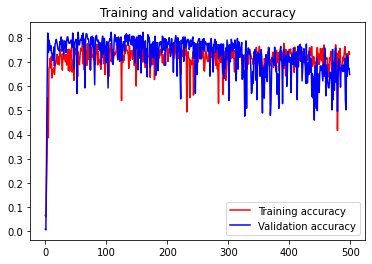

<Figure size 432x288 with 0 Axes>

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [43]:
model_json = model.to_json()
with open(f"{modelName}.json", "w") as json_file:
    json_file.write(model_json)

In [44]:
import tensorflow_hub as hub

In [45]:
from tensorflow.keras.models import model_from_json
# load json and create model
json_file = open(f"{modelName}.json", "r")
loaded_model_json = json_file.read()
json_file.close()


In [46]:
print(loaded_model_json)

{"class_name": "Sequential", "config": {"name": "sequential_2", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 5, 12], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv1d_2_input"}}, {"class_name": "Conv1D", "config": {"name": "conv1d_2", "trainable": true, "batch_input_shape": [null, 5, 12], "dtype": "float32", "filters": 64, "kernel_size": [1], "strides": [1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling1D", "config": {"name": "max_pooling1d_2", "trainable": true, "dtype": "float32", "strides": [2], "pool_size": [2], "padding": "valid", "data_format": "ch

In [47]:
model = model_from_json(loaded_model_json, custom_objects={'KerasLayer': hub.KerasLayer})

In [48]:
model.load_weights(f"{modelName}_bestweights.hdf5")

In [55]:
predictions = model.predict(xVal, verbose = 1)
len(predictions)

10/10 [==============================] - 0s 843us/step


294

In [53]:
# predictions_2 = model.predict(ytest, verbose = 1)
# len(predictions)

In [51]:
# print(predictions_2[:5])

In [56]:
print(predictions[:5])

[[5.49518177e-03 7.26613402e-01 4.85854261e-02 1.88692901e-02
  1.24374345e-01 2.38590781e-02 6.04846573e-04 5.15984744e-02]
 [4.09938633e-01 3.50305490e-05 3.59497778e-02 6.60240576e-02
  2.93399692e-02 5.86562231e-02 7.00430125e-02 3.30013305e-01]
 [5.17977122e-03 7.38831162e-01 4.91843522e-02 1.88229159e-02
  1.21667407e-01 2.12900378e-02 4.92344378e-04 4.45319414e-02]
 [6.56119501e-03 6.74671948e-01 6.06092215e-02 3.06207873e-02
  1.38784006e-01 3.20695229e-02 1.58628367e-03 5.50970547e-02]
 [3.54393542e-01 5.47499076e-05 3.83713767e-02 6.32282272e-02
  3.24736051e-02 4.95377667e-02 5.33334650e-02 4.08607304e-01]]


In [83]:
# print(yTest[0])

In [57]:
classification = []
for row in predictions:
    value = np.argmax(row)
    classification.append(value) 

In [48]:
# classification_2 = []
# for row in predictions_2:
#     value = np.argmax(row)
#     classification_2.append(value) 

In [58]:
print(classification)

[1, 0, 1, 1, 7, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 0, 0, 0, 6, 6, 6, 7, 6, 7, 5, 6, 1, 5, 5, 6, 6, 6, 6, 6, 1, 0, 1, 3, 3, 1, 1, 0, 0, 0, 0, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 7, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 6, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 7, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 3, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 7, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 7, 0, 0, 0, 0, 1, 7, 1, 0, 1]


In [59]:
len(classification)

294

In [60]:
# len(classification_2)

In [61]:
np.unique(classification)

array([0, 1, 3, 5, 6, 7])

In [107]:
# np.unique(classification_2)

In [62]:
y_predicted = np.array(classification)

In [50]:
# y_predicted_2 = np.array(classification_2)

In [63]:
y_predicted.shape

(294,)

In [64]:
yVal.shape

(294,)

In [65]:
cMatrix = confusion_matrix(yVal, y_predicted)
print(cMatrix)

[[126   0   0   0   0   0   1   9]
 [  0 129   0   1   0   0   0   0]
 [  0   0   0   0   0   0   0   2]
 [  0   4   0   2   0   0   0   0]
 [  0   1   0   0   0   0   1   0]
 [  0   0   0   0   0   3   8   2]
 [  0   1   0   0   0   0   1   0]
 [  3   0   0   0   0   0   0   0]]


In [1]:
# cMatrix = confusion_matrix(yVal, y_predicted)
# print(cMatrix)

In [66]:
accuracy_score(yVal,y_predicted)

0.8877551020408163

In [2]:
# accuracy_score(yVal,y_predicted)

In [69]:
len(val_grouped['fid'])
df_preds = pd.DataFrame(predictions)
df_preds["field_id"] = val_grouped["fid"].reset_index(drop=True).astype(int)
df_preds = df_preds[["field_id"] + [x for x in range(8)]]
df_preds = df_preds.rename(columns={
    "field_id": "Field_ID",
    0: "Crop_ID_1",
    1: "Crop_ID_2",
    2: "Crop_ID_3",
    3: "Crop_ID_4",
    4: "Crop_ID_5",
    5: "Crop_ID_6",
    6: "Crop_ID_7",
    7: "Crop_ID_8",
#     8: "Crop_ID_9",
#     9: "Crop_ID_10"
})

In [70]:
len(df_preds)

294

In [75]:
df_preds.to_csv("CNN_validation_data_Asia_cotton_0.822test_0.887val_2021_12_16.csv", index=False)

In [71]:
from sklearn.metrics import f1_score

In [72]:
f1_score(yVal, y_predicted, average=None)

array([0.9509434 , 0.97358491, 0.        , 0.44444444, 0.        ,
       0.375     , 0.15384615, 0.        ])

In [73]:
f1_score(yVal, y_predicted, average='weighted')

0.8970874101938793

In [3]:
# f1_score(yVal, y_predicted, average='weighted')

In [74]:
y_predicted_withfid = classification+field_idvalues

NameError: name 'field_idvalues' is not defined